# Bài thực hành số 1: Các kỹ thuật không phụ thuộc vào không gian

## 1. Histogram Pixel for Photo

In [27]:
# import libraries

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from PIL import Image
import cv2 
sns.set_style("darkgrid")

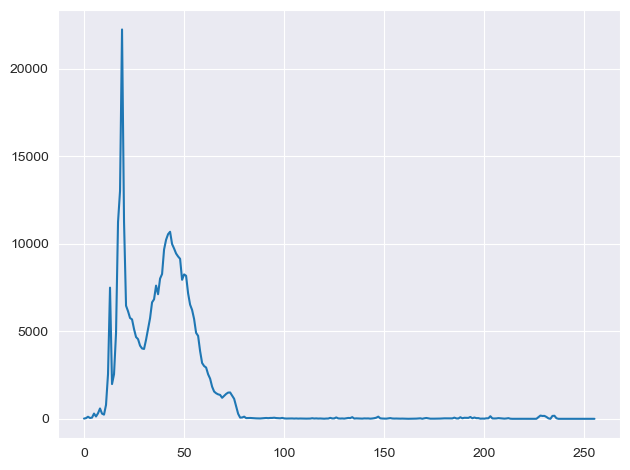

In [28]:

def count_pixel_in_image(image_path, image = None):
    if image == None:
        img = cv2.imread(image_path)
        
        # biến đổi ảnh nhiều chiều thành 1 chiều theo thứ tự cột trước hàng sau
        # print(img.ravel()) 
        h2 = np.histogram(img.ravel(), bins=256, range=[0,256])
        plt.plot(h2[0])
        plt.tight_layout()
    else: 
         image = np.array(image)
         h2 = np.histogram(image.ravel(), bins=256, range=[0, 256])
         plt.plot(h2[0])
         plt.tight_layout()

image_path = "C:/Users/bluei/Desktop/THXLA/L1/DATA/data/anh1.png"
count_pixel_in_image(image_path)

## 2. Tăng giảm độ sáng cho ảnh

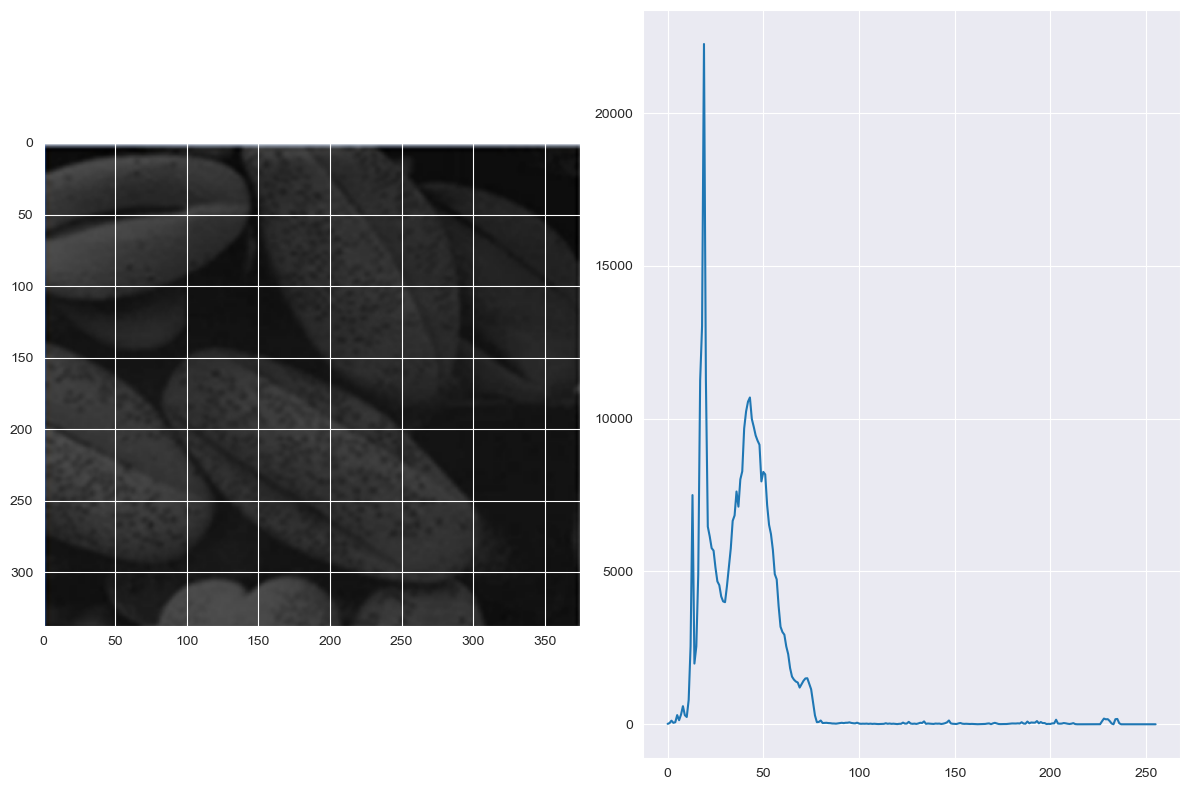

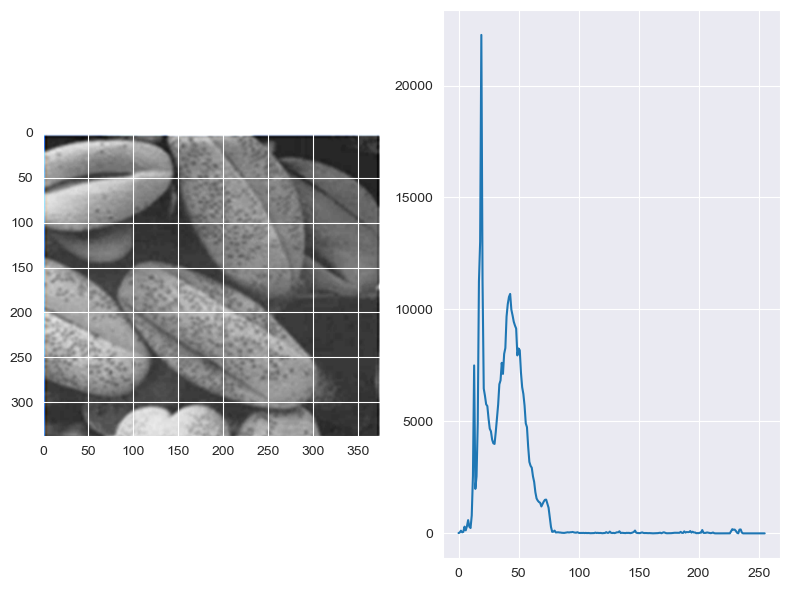

In [29]:
def adjust_Bright(image_path, factor):
    """
    Adjust the brightness of an image by multiplying each pixel's value by the brightness factor 
    if the brighness_factor is less than , the image will be darker
    if the brighness_factor is greater than 1, the image will be brighter

    Args : 

        image_path (str) : The path to the image file.
        factor (float): the factor by which to adjust the brightness
        
    Return:
        Image: The image with adjusted brightness.
    """


    img = Image.open(image_path)
    img_bright = img.convert('RGB')


    # Get pixel data 
    pixels = img_bright.load()

    #,Adjust brightness for each pixel 
    for i in range(img_bright.width):
        for j in range(img_bright.height):
            r, g, b = pixels[i, j]
            r = int(r * factor)
            g = int(g * factor)
            b = int(b * factor) 

            pixels[i, j] = (r, g, b)
    
    plt.figure(figsize=(8, 6))
    plt.subplot(121)
    plt.imshow(img_bright)
    plt.subplot(122)
    count_pixel_in_image(image_path)

image = Image.open(image_path)
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
count_pixel_in_image(image_path)    
adjust_Bright(image_path, 3)

## 3. Tăng cường độ tương phản


$$

f(x) = \begin{cases}
        l_{min} \ if \ x \leq l_{min} \\
        (l_{max} - l_{min}) \frac{x - min}{max - min} + l_{min} \ min < x  < max \\
        l_{max}  \ if \ x \geq max
\end{cases}

$$ 

Text(0.5, 1.0, 'Image after constrast')

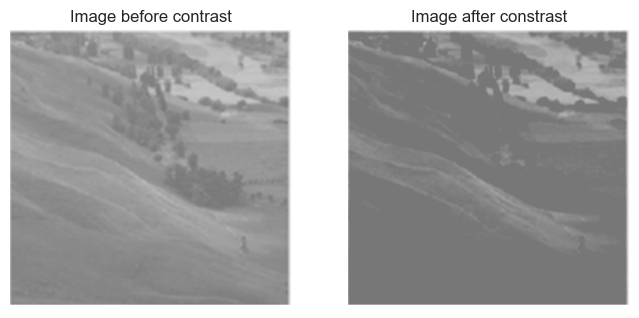

In [36]:
def contrast(image):

    # chuyển hình ảnh về mảng np.ndarray 
    img_array = np.array(image, dtype= np.float32) 

    # tính giá trị trung bình cho ảnh 
    mean_value = np.mean(img_array, dtype= np.float32)

    # tính độ lệch chuẩn 
    std_deviation = np.std(img_array)

    min_value, max_value = np.min(img_array), np.max(img_array)

     # Tính giá trị min và max mới dựa trên độ lệch chuẩn
    lmin_value = max(mean_value - 2 * std_deviation, 0)  # Đảm bảo giá trị không âm
    lmax_value = min(mean_value + 2 * std_deviation, 255)  # Đảm bảo giá trị không vượt quá 255

   
    adjust_contrast_img = ((img_array - min_value) / (max_value - min_value)) * (lmax_value - lmin_value) + lmin_value

    
    adjust_contrast_img = np.clip(adjust_contrast_img, min_value, max_value)

    return adjust_contrast_img / 255.0

image2 = Image.open("C:/Users/bluei/Desktop/THXLA/L1/DATA/data/anh2.png")

plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.imshow(image2)
plt.axis("off")
plt.title("Image before contrast")

plt.subplot(122)
plt.imshow(contrast(image2))
plt.axis("off")
plt.title("Image after constrast")
